In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error

In [2]:
customer_churn = pd.read_csv("/home/gautam/airflow/projects/Project customer churn/customer_churn.csv")

In [3]:
customer_churn.keys()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
print("Missing Values:\n", customer_churn.isnull().sum())

Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
customer_5 = customer_churn.iloc[:, 4]

In [7]:
customer_15 = customer_churn.iloc[:, 14]

In [8]:
senior_male_electronic = customer_churn[
    (customer_churn["gender"] == "Male") & 
    (customer_churn["SeniorCitizen"] == 1) & 
    (customer_churn["PaymentMethod"] == "Electronic check")
]

In [9]:
customer_total_tenure = customer_churn[
    (customer_churn["tenure"] > 70) | 
    (customer_churn["MonthlyCharges"] > 100)
]

In [10]:
two_mail_yes = customer_churn[
    (customer_churn["Contract"] == "Two year") & 
    (customer_churn["PaymentMethod"] == "Mailed check") & 
    (customer_churn["Churn"] == "Yes")
]

In [11]:
customer_333 = customer_churn.sample(n=333, random_state=42)

In [12]:
churn_counts = customer_churn["Churn"].value_counts()
print(churn_counts)

Churn
No     5174
Yes    1869
Name: count, dtype: int64


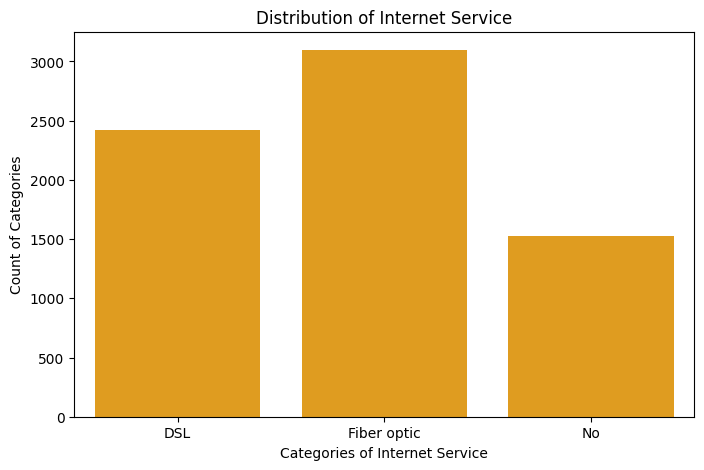

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x="InternetService", data=customer_churn, color="orange")
plt.xlabel("Categories of Internet Service")
plt.ylabel("Count of Categories")
plt.title("Distribution of Internet Service")
plt.show()

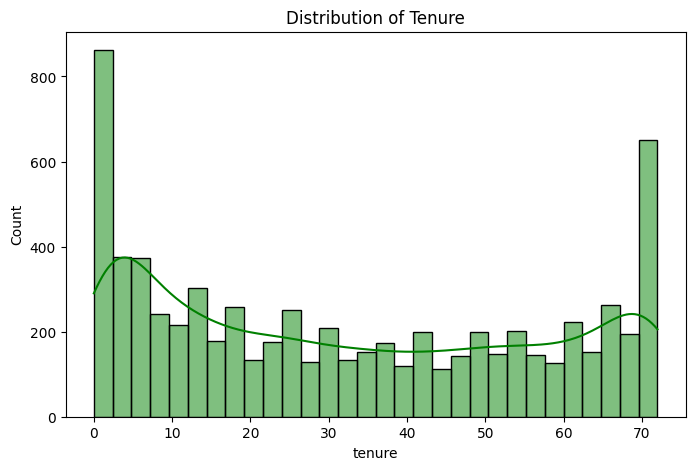

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(customer_churn["tenure"], bins=30, color="green", kde=True)
plt.title("Distribution of Tenure")
plt.show()

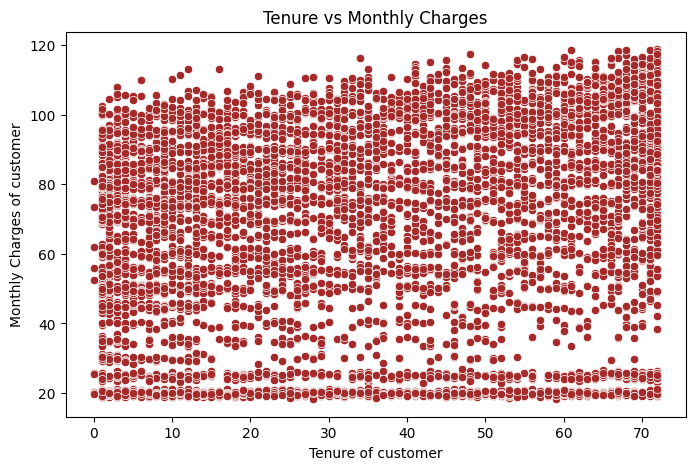

In [15]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="tenure", y="MonthlyCharges", data=customer_churn, color="brown")
plt.xlabel("Tenure of customer")
plt.ylabel("Monthly Charges of customer")
plt.title("Tenure vs Monthly Charges")
plt.show()

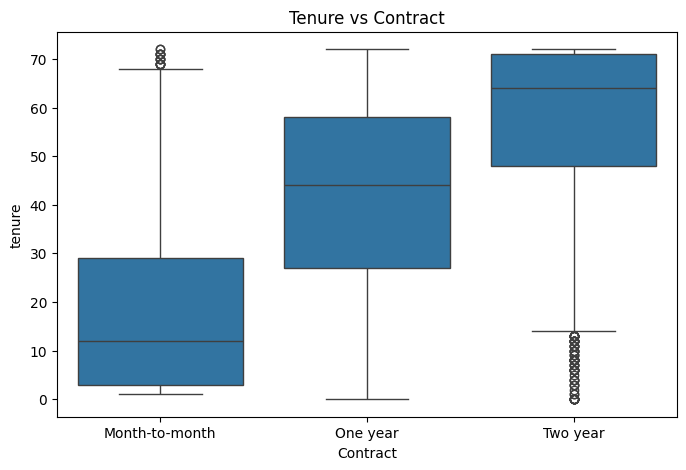

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Contract", y="tenure", data=customer_churn)
plt.title("Tenure vs Contract")
plt.show()

In [17]:
X = customer_churn[["tenure"]]
y = customer_churn["MonthlyCharges"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [20]:
y_pred = lr.predict(X_test)

In [21]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 29.07936015646814


In [22]:
customer_churn["Churn"] = customer_churn["Churn"].map({"Yes": 1, "No": 0})

In [23]:
X = customer_churn[["MonthlyCharges"]]
y = customer_churn["Churn"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [25]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [26]:
y_pred = log_reg.predict(X_test)

In [27]:
acc = accuracy_score(y_test, y_pred)
print

<function print>

In [28]:
print(confusion_matrix(y_test, y_pred))

[[1797    0]
 [ 669    0]]


In [29]:
X = customer_churn[["tenure", "MonthlyCharges"]]
y = customer_churn["Churn"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred = log_reg.predict(X_test)

In [33]:
acc = accuracy_score(y_test, y_pred)
print("Multiple Logistic Regression Accuracy:", acc)

Multiple Logistic Regression Accuracy: 0.7977288857345636


In [34]:
X = customer_churn[["tenure"]]
y = customer_churn["Churn"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
y_pred = dt.predict(X_test)

In [38]:
acc = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", acc)

Decision Tree Accuracy: 0.7572746628814763


In [39]:
print(confusion_matrix(y_test, y_pred))

[[951  85]
 [257 116]]


In [ ]:
X = customer_churn[["tenure", "MonthlyCharges"]]
y = customer_churn["Churn"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
y_pred = rf.predict(X_test)

In [44]:
acc = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", acc)

Random Forest Accuracy: 0.7605300520586843


In [45]:
print(confusion_matrix(y_test, y_pred))

[[1341  198]
 [ 308  266]]
